# HOW TO RETRIEVE AND USE MOMENT TENSOR DATA

The data are available through the [GeoNet GitHub data repository](https://github.com/GeoNet/data/tree/main/moment-tensor), and more information on the dataset can be found there.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data retrieval and basic mapping
### 3. Compare moment magnitude with other magnitudes

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for datetime functionality
import datetime as dt

#for mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#show moment-tensor solutions on map
from obspy.imaging.beachball import beach

#for a comparison magnitudes
from obspy.clients.fdsn import Client as FDSN_Client

## &nbsp;2. Basic data retrieval and mapping

We retrieve the complete file of solutions and then select one to display on a map. For further information on displaying moment-tensor mechanisms on a map, refer to the [example in Obspy](https://docs.obspy.org/tutorial/code_snippets/cartopy_plot_with_beachballs.html#cartopy-plot-of-a-local-area-with-beachballs)

In [2]:
url = 'https://raw.githubusercontent.com/GeoNet/data/refs/heads/main/moment-tensor/GeoNet_CMT_solutions.csv'
mt = pd.read_csv(url)

In [3]:
mt.tail()

,PublicID,Date,Latitude,Longitude,strike1,dip1,rake1,strike2,dip2,rake2,...,Tva,Tpl,Taz,Nva,Npl,Naz,Pva,Ppl,Paz,Method
3493,2025p278838,20250414040500,-40.1291,174.3710,243,85,-130,147,41,-8,...,177.21,28,4,-21.29,40,248,-155.92,37,118,2
3494,2025p280546,20250414191500,-38.3621,177.8667,341,85,111,84,22,15,...,22.52,46,272,-5.90,21,158,-16.62,36,52,2
3495,2025p283258,20250415192000,-38.8993,178.1304,3,57,-134,244,53,-43,...,62.73,3,123,20.30,36,31,-83.03,54,216,2
3496,2025p291548,20250418205600,-39.2504,176.3593,138,80,13,46,77,170,...,150.02,16,2,0.30,74,174,-150.32,2,272,2
3497,2025p311033,20250426015800,-39.4428,177.0572,161,70,145,265,58,24,...,45.91,39,120,2.56,51,315,-48.47,7,215,2


In [4]:
#retrieve the event with row number 3436, this occurred on 2024-12-17 and was located close to Cook Strait
mtevent = mt.iloc[3436]

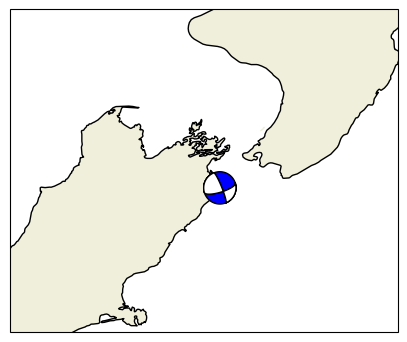

In [5]:
fig = plt.figure(figsize=(5,5))

#basemap
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([171, 177, -44, -39], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

#event location
x = mtevent['Longitude']
y = mtevent['Latitude']

#event mechanism
fm = [mtevent['strike1'], mtevent['dip1'],mtevent['rake1']]
b = beach(fm, xy=(x,y), width=0.5, linewidth=1, zorder=10)
ax.add_collection(b)

## &nbsp;3. Compare moment magnitude with other magnitudes

We use the GeoNet FDSN webservice and follow steps in [this tutorial](https://github.com/GeoNet/data-tutorials/blob/main/FDSN/FDSN_specific-event.ipynb)

In [6]:
#define GeoNet FDSN client
client = FDSN_Client("GEONET")

In [7]:
#get moment tensor magnitude
mtmag = mtevent['Mw']
print ('Mw', mtmag)

Mw 4.9


In [8]:
#use Public ID to get the event from FDSN client
pid = mtevent['PublicID']
cat = client.get_events(eventid=pid)

event = cat[0]
magnitudes = event.magnitudes

#can be more than one magnitude so get all
for i in range(len(magnitudes)):
    mtype = magnitudes[i].magnitude_type
    mval = magnitudes[i].mag
    print (mtype, mval)

ML 4.875473966928981
MLv 5.120054333578334
